<a href="https://colab.research.google.com/github/PILKWANG/KangLab/blob/master/python%20code/pattern%20recognition/boyle_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공지능과 과학교육(회귀분석)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# <Step1. 탐색> 압력, 부피 데이터 살펴보기

### [압력, 부피 데이터셋의 기본 정보]

In [2]:
boyle_file_path = 'sample_data/sklearn-train1.csv'
boyle_skl = pd.read_csv(boyle_file_path)
boyle_skl.dropna()

,pressure,volume
0,100,1.000000
1,101,0.990099
2,102,0.980392
3,103,0.970874
4,104,0.961538
...,...,...
995,1095,0.091324
996,1096,0.091241
997,1097,0.091158
998,1098,0.091075


In [3]:
boyle_skl.columns

Index(['pressure', 'volume'], dtype='object')

In [4]:
boyle_skl.head()

,pressure,volume
0,100,1.000000
1,101,0.990099
2,102,0.980392
3,103,0.970874
4,104,0.961538


In [5]:
print(boyle_skl.shape)

(1000, 2)


-----

### [회귀 분석에 사용할 피처 살펴보기]

In [6]:
boyle_features_df = boyle_skl[['pressure', 'volume']]

In [7]:
# 피처 각각에 대한 scatter을 출력합니다.
def plot_scatter_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
         
    plt.scatter(df[df.columns[0]], df[df.columns[1]])
    plt.xlabel('P')
    plt.ylabel('V')
    plt.show()

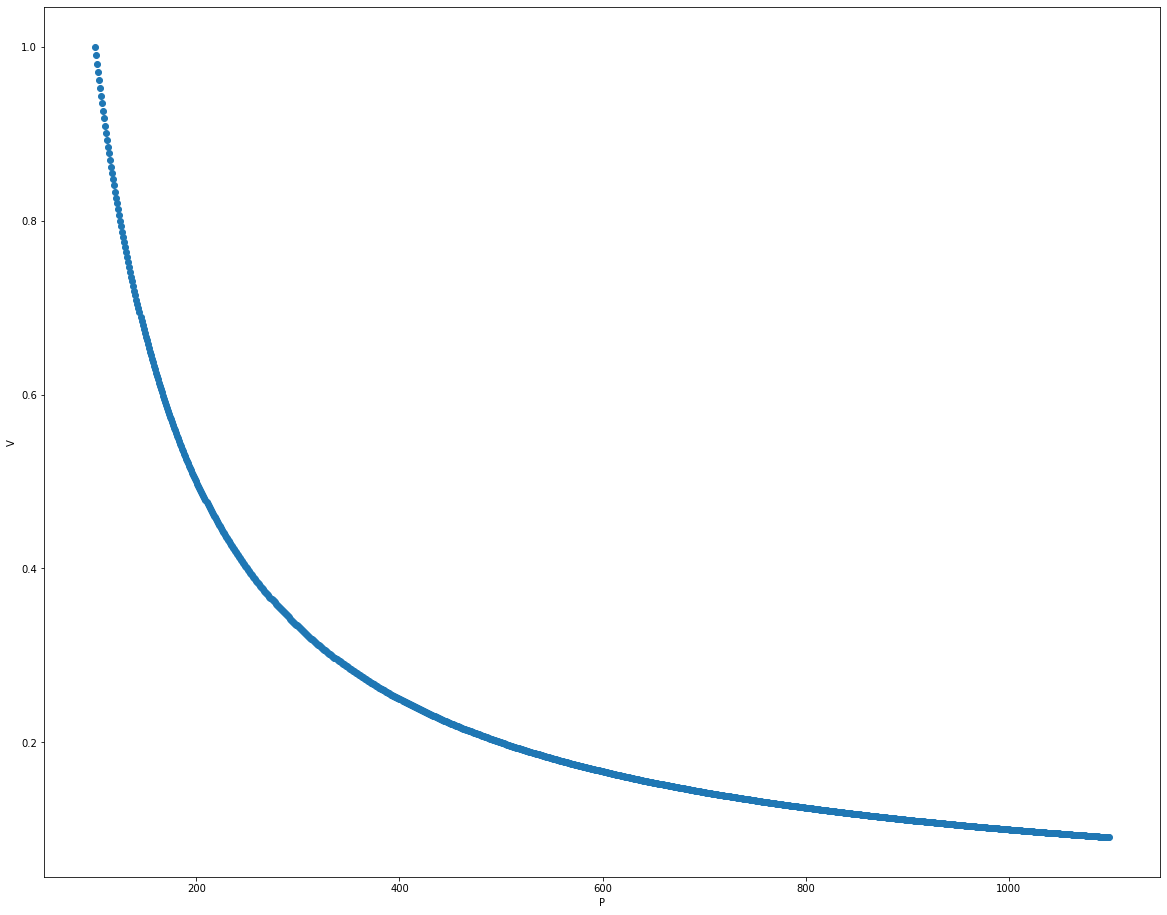

In [8]:
plot_scatter_each_column(boyle_features_df)

-----

# <Step2. 예측> : 압력과 부피 관계 예측하기

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터 지정
x_train = boyle_skl[['pressure']]
y_train = boyle_skl[['volume']]

In [14]:
print(x_train.head())

   pressure
0       100
1       101
2       102
3       103
4       104


In [ ]:
print(y_train.head())

     volume
0  1.000000
1  0.990099
2  0.980392
3  0.970874
4  0.961538


##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [ ]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [ ]:
# 학습된 계수를 출력합니다.
print(lr.coef_,lr.intercept_)
volume = lr.predict([[5000]])
print(volume)

[[-0.00052832]] [0.55697414]
[[-2.08463753]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
boyle_skl.columns
print(f'y절편 : {lr.intercept_}, 기울기:{lr.coef_}')

y절편 : [0.55697414], 기울기:[[-0.00052832]]


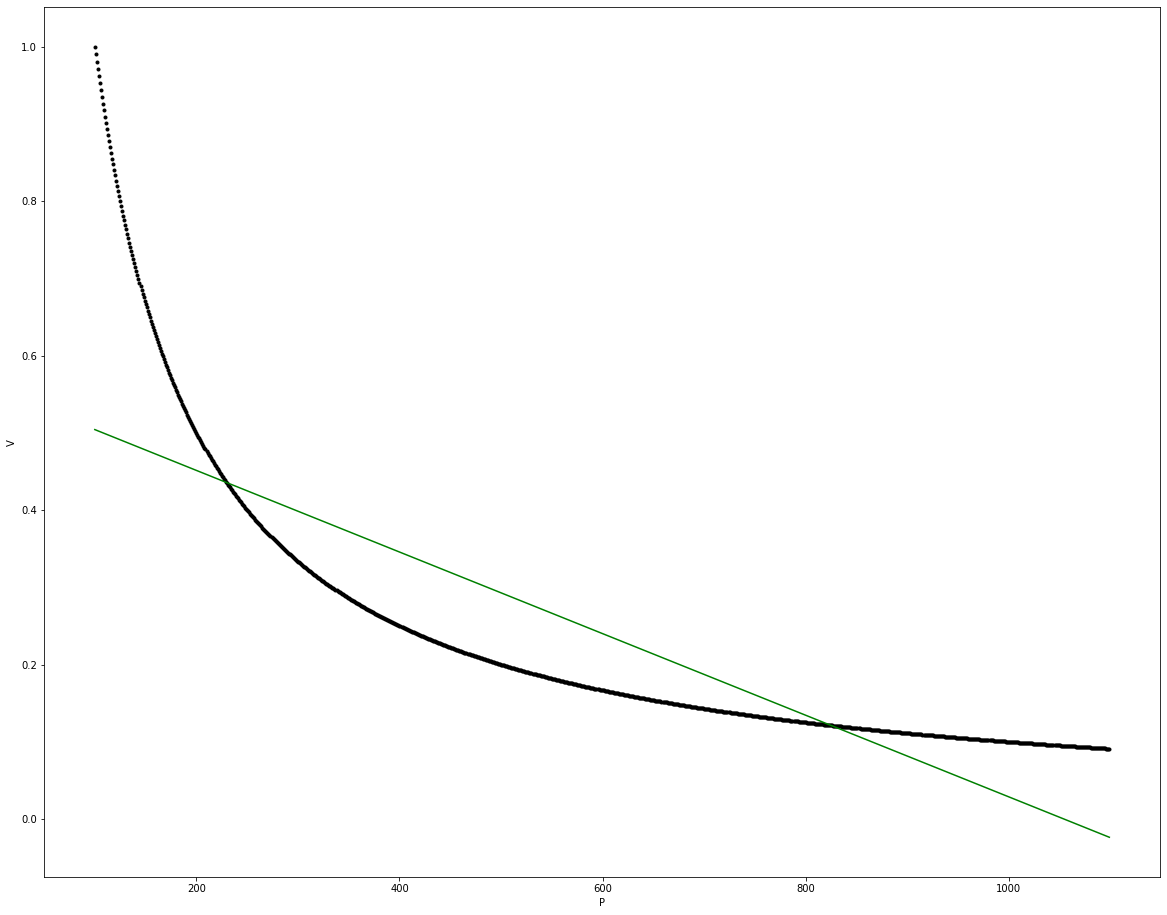

In [ ]:
plt.xlabel('P')
plt.ylabel('V')
plt.plot(x_train,y_train,'k.')
plt.plot(x_train,lr.predict(x_train),color='g')

-----

# <Step3. 평가> : 예측 모델 평가하기

In [ ]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [ ]:
boyle_file_path1 = 'sample_data/sklearn-test1.csv'
boyle_skl_test = pd.read_csv(boyle_file_path1)
boyle_skl_test.dropna()

,pressure,volume
0,1100,0.090909
1,1101,0.090827
2,1102,0.090744
3,1103,0.090662
4,1104,0.090580
...,...,...
95,1195,0.083682
96,1196,0.083612
97,1197,0.083542
98,1198,0.083472


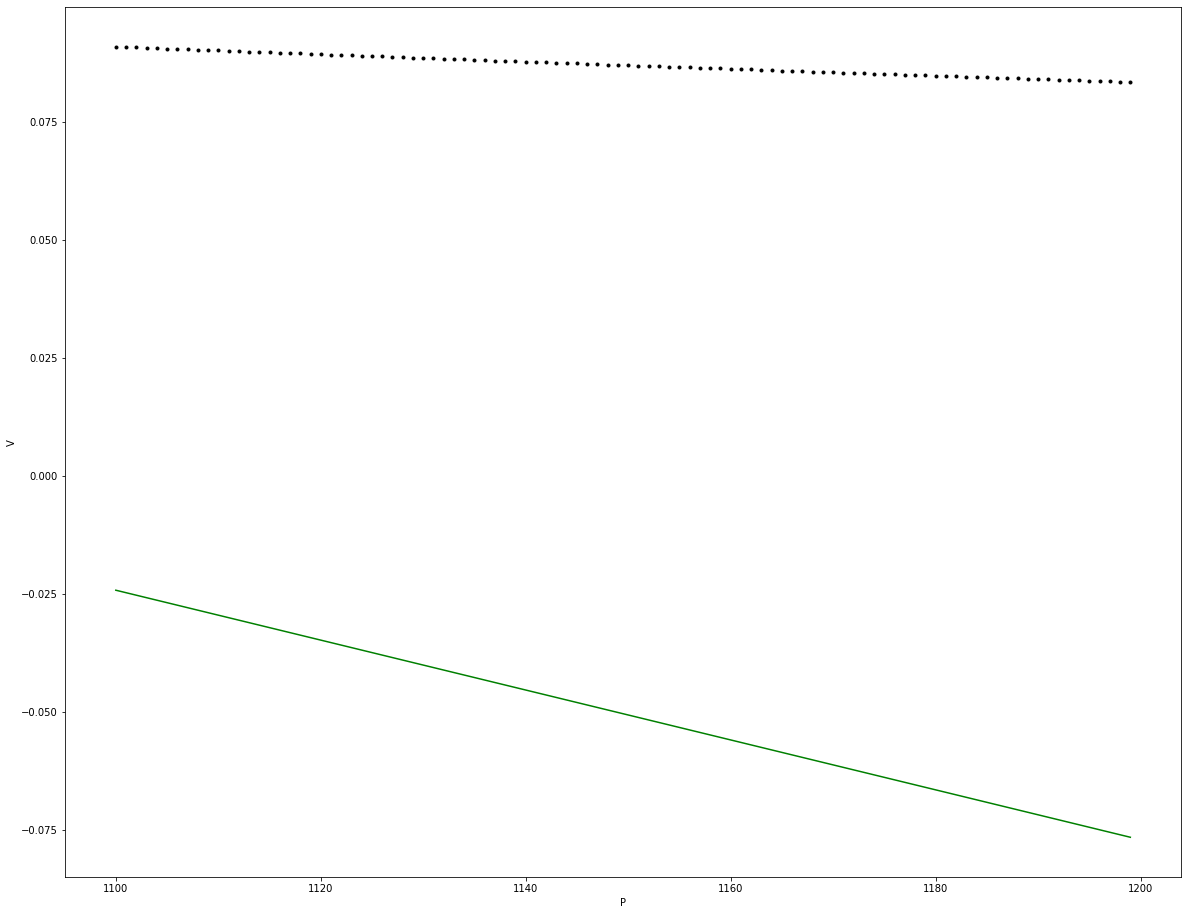

In [ ]:
x_test = boyle_skl_test[['pressure']]
y_test = boyle_skl_test[['volume']]
plt.xlabel('P')
plt.ylabel('V')
plt.plot(x_test,y_test,'k.')
plt.plot(x_test,lr.predict(x_test),color='g')

##### RMSE score

In [ ]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(x_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

0.13800136188115883


-----

# <Step4. 다중선형회귀> 변수 만들기

In [ ]:
train_poly = np.column_stack((x_train**2, x_train))
test_poly = np.column_stack((x_test**2, x_test))

In [ ]:
print(train_poly.shape, test_poly.shape)

(1000, 2) (100, 2)


In [ ]:
lr = linear_model.LinearRegression()
lr.fit(train_poly, y_train)

print(lr.predict([[60**2,60]]))

[[0.76359369]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 1.14726968e-06 -1.90389868e-03]] [0.87369744]


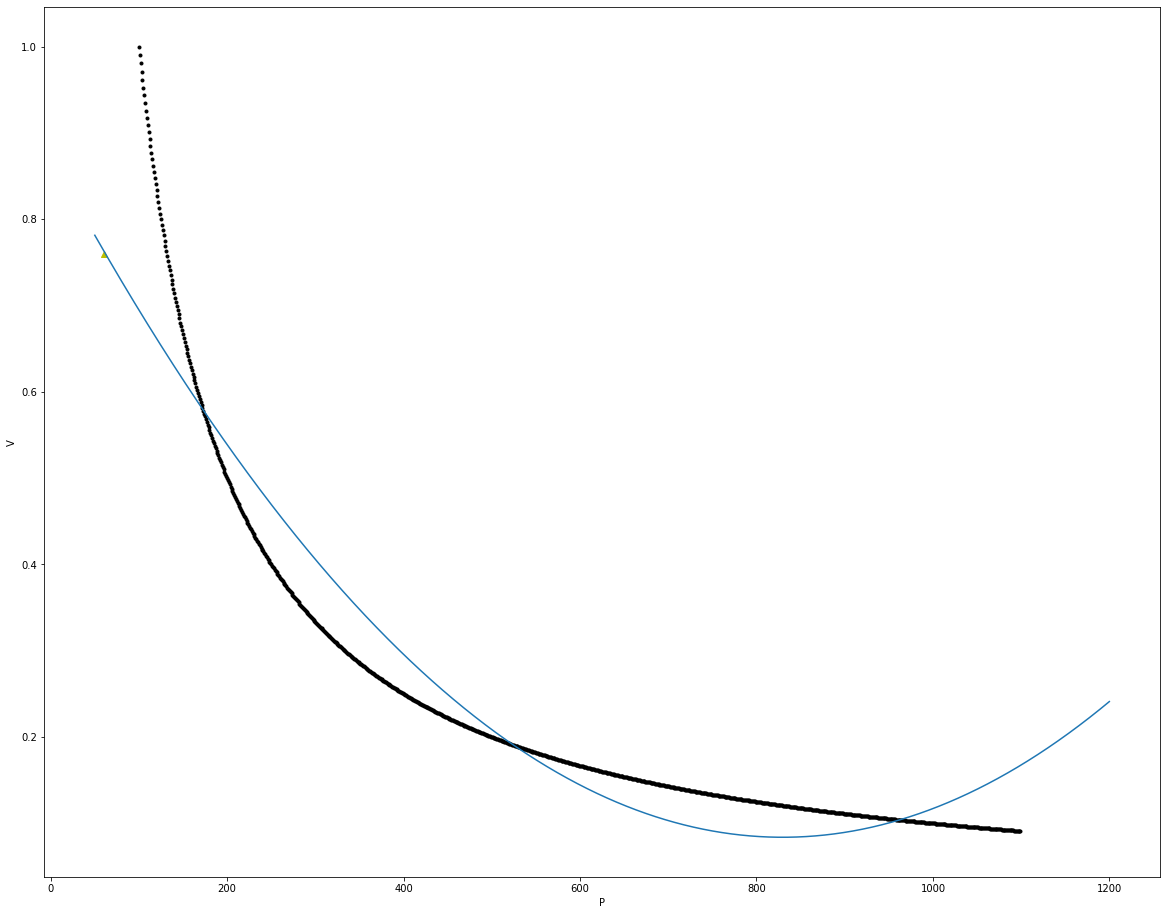

In [ ]:
plt.plot(x_train, y_train,'k.')
plt.scatter(60, 0.76, marker='^', color='y')

point = np.arange(50, 1200, 0.05)
plt.plot(point, 1.14726968e-06*point**2 - 1.90389868e-03*point + 0.87369744)

plt.xlabel('P')
plt.ylabel('V')
plt.show()

In [ ]:
# 회귀 분석 모델을 평가합니다.
y_poly_predictions = lr.predict(test_poly)
print(sqrt(mean_squared_error(y_test, y_poly_predictions))) # test RMSE score를 출력합니다.

0.1173697408901945
